# ***Weakly Supervised Multiple Instance Learning for Prostate Cancer Histopathology (SICAPv2)***

# **Sprint 0: Descarga / importación del dataset**

Este bloque deja evidencia de origen de datos, trazabilidad y organización reproducible.

## 0.1 Definición de rutas base

In [ ]:
import os
import shutil

BASE_PATH = "/content"
DATA_ROOT = os.path.join(BASE_PATH, "sicapv2_data")
DATASET_PATH = os.path.join(DATA_ROOT, "SICAPv2")
META_PATH = os.path.join(DATASET_PATH, "metadata")

os.makedirs(META_PATH, exist_ok=True)

## 0.2 Importación del dataset

In [ ]:
ZIP_MAIN = "/content/sicapv2.zip"

if not os.path.exists(ZIP_MAIN):
    print("Archivo ZIP principal NO existe. Descargando...")

    # Enlace de descarga para el archivo ZIP
    download_url = "https://data.mendeley.com/public-api/zip/9xxm58dvs3/download/1"

    # Descargar el archivo ZIP y guardarlo como sicapv2.zip
    !wget -O $ZIP_MAIN $download_url
else:
    print("Archivo ZIP principal ya existe → NO se descarga.")


Archivo ZIP principal NO existe. Descargando...
--2026-02-06 20:24:36--  https://data.mendeley.com/public-api/zip/9xxm58dvs3/download/1
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/9xxm58dvs3-1.zip?X-Amz-Security-Token=IQoJb3JpZ2luX2VjEIX%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEaCWV1LXdlc3QtMSJHMEUCIQD1eVSE%2Bl3tI7tW1DIEIhKEsi565nHM0zDM2x01tSJluAIgKsLLxUpxFwNBe8%2FvvRB0QpfkgmKgi%2BlB0NM6qy0y%2BvYqjAUIThAEGgwzNjcxNDczODM4MjUiDCic8vKWvxoukegbmyrpBIIJAGEmomelWatD02JZzEzQznTWMvhE6VY59fVPIbZ2mJSkbHHikPGDPxVYItwNSg6c%2BNKtlvPlDdlwbsn3EzwcZwho6R3RFksfK6OKdA5gAYg9CUHKTFeeH15jPD%2BY5hUQrf4rHnedupO3JgdbimYECW5hjfyuN8Yb6TO%2FYGWi8O%2BYjpZCJtFXW7cULCwcWv15WjOezKl0h954kF9s66RMmpdHCq93vzzr2lKaKaUcal3v5q0BLmSEtOti2%2BJPGXD1e7VKg2Oap0%2BaCoxM7zEZVFnp9P%2BSONoAGVJ8

### Descomprimimos el Archivo ZIP principal

In [ ]:
INTERMEDIATE_DIR = "/content/intermediate_data"
!unzip -q $ZIP_MAIN -d $INTERMEDIATE_DIR


In [ ]:
# Listar los contenidos para verificar
!ls /content/intermediate_data

SICAPv2.zip


## 0.3 Descomprimir el Archivo ZIP Anidado (SICAPv2.zip)

####"/content/intermediate_data/SICAPv2.../SICAPv2.zip"

In [ ]:
nested_zip = None
for root, _, files in os.walk(INTERMEDIATE_DIR):
    for f in files:
        if f.endswith(".zip"):
            nested_zip = os.path.join(root, f)
            break

assert nested_zip is not None, "ZIP SICAPv2 no encontrado"

!unzip -q "$nested_zip" -d $DATA_ROOT


In [ ]:
assert os.path.exists(DATASET_PATH)
assert len(os.listdir(DATASET_PATH)) > 0


## 0.4. Limpiar y Organizar el Espacio

In [ ]:
if os.path.exists(ZIP_MAIN):
    print("Eliminando ZIP principal...")

    # Eliminar el archivo ZIP principal
    !rm $ZIP_MAIN

if os.path.exists(INTERMEDIATE_DIR):
    print("Eliminando carpeta intermedia...")

    # Eliminar el directorio intermedio y su contenido de forma recursiva
    !rm -r $INTERMEDIATE_DIR


Eliminando ZIP principal...
Eliminando carpeta intermedia...


In [ ]:
print("\nContenido de /content:")
!ls /content


Contenido de /content:
sample_data  sicapv2_data


# **Sprint 1: Entendimiento y organización del dataset SICAPv2**

Propósito del sprint

1. Verificar la estructura real del dataset descargado
2. Identificar qué información tenemos (imágenes, máscaras, labels WSI)
3. Preparar una organización coherente para Aprendizaje con Múltiples Instancias (MIL)
4. Dejar trazabilidad clara para el documento de tesis

## 1.1 Verificación de la estructura del dataset

Primero, inspeccionamos qué hay realmente en disco. Esto es clave porque SICAPv2 no es homogéneo entre Kaggle y Mendeley.

In [ ]:
def printTree(path, level=2):
    for root, dirs, files in os.walk(path):
        depth = root.replace(path, "").count(os.sep)
        if depth > level:
            continue
        indent = " " * 4 * depth
        print(f"{indent}{os.path.basename(root)}/")
        for f in files[:5]:
            print(f"{indent}    {f}")


In [ ]:
printTree(DATASET_PATH, level=3)

SICAPv2/
    wsi_labels.xlsx
    readme.txt
    masks/
        17B0027608_Block_Region_7_0_14_xini_30068_yini_44883.jpg
        18B0001510J_Block_Region_2_4_41_xini_47519_yini_66114.jpg
        18B0003894H_Block_Region_8_19_39_xini_45982_yini_67782.jpg
        16B0022786_Block_Region_0_15_6_xini_19457_yini_112560.jpg
        16B0027040_Block_Region_13_0_1_xini_61596_yini_4522.jpg
    images/
        17B0027608_Block_Region_7_0_14_xini_30068_yini_44883.jpg
        18B0001510J_Block_Region_2_4_41_xini_47519_yini_66114.jpg
        18B0003894H_Block_Region_8_19_39_xini_45982_yini_67782.jpg
        16B0022786_Block_Region_0_15_6_xini_19457_yini_112560.jpg
        16B0027040_Block_Region_13_0_1_xini_61596_yini_4522.jpg
    partition/
        Validation/
            Val3/
                TrainCribfriform.xlsx
                TestCribfriform.xlsx
                Test.xlsx
                Train.xlsx
            Val4/
                TrainCribfriform.xlsx
                TestCribfriform.xlsx
   

## 1.2 Definición de Paths

In [ ]:
IMAGES_DIR = os.path.join(DATASET_PATH, "images")
MASKS_DIR  = os.path.join(DATASET_PATH, "masks")
PARTITION_DIR = os.path.join(DATASET_PATH, "partition")


In [ ]:
for p in [IMAGES_DIR, MASKS_DIR, PARTITION_DIR]:
    print(p, "→", os.path.exists(p))

/content/sicapv2_data/SICAPv2/images → True
/content/sicapv2_data/SICAPv2/masks → True
/content/sicapv2_data/SICAPv2/partition → True


## 1.3 Conteo y verificación básica de datos

In [ ]:
def countFiles(path, ext=".jpg"):
    return len([f for f in os.listdir(path) if f.lower().endswith(ext)])

In [ ]:
print("Conteo global de patches")
stats = {
    "total_images": countFiles(IMAGES_DIR),
    "total_masks": countFiles(MASKS_DIR)
}

stats

Conteo global de patches


{'total_images': 18783, 'total_masks': 18783}

## 1.4 Consistencia imagen–máscara

In [ ]:
imagesSet = set(os.listdir(IMAGES_DIR))
masksSet  = set(os.listdir(MASKS_DIR))

print("Imágenes sin máscara:", len(imagesSet - masksSet))
print("Máscaras sin imagen:", len(masksSet - imagesSet))


Imágenes sin máscara: 0
Máscaras sin imagen: 0


## 1.5 Particiones oficiales

In [ ]:
printTree(PARTITION_DIR, level=3)

partition/
    Validation/
        Val3/
            TrainCribfriform.xlsx
            TestCribfriform.xlsx
            Test.xlsx
            Train.xlsx
        Val4/
            TrainCribfriform.xlsx
            TestCribfriform.xlsx
            Test.xlsx
            Train.xlsx
        Val2/
            TrainCribfriform.xlsx
            TestCribfriform.xlsx
            Test.xlsx
            Train.xlsx
        Val1/
            TrainCribfriform.xlsx
            TestCribfriform.xlsx
            Test.xlsx
            Train.xlsx
    Test/
        TrainCribfriform.xlsx
        TestCribfriform.xlsx
        Test.xlsx
        Train.xlsx


## 1.6 Verificamos qué contienen los Train.xlsx / Test.xlsx

In [ ]:
import pandas as pd

samplePartition = pd.read_excel(
    os.path.join(PARTITION_DIR, "Validation", "Val1", "Train.xlsx")
)

samplePartition.head()

,image_name,NC,G3,G4,G5,G4C
0,16B0001851_Block_Region_1_0_0_xini_6803_yini_5...,0,0,0,1,0
1,16B0001851_Block_Region_1_0_1_xini_7827_yini_5...,0,0,0,1,0
2,16B0001851_Block_Region_1_0_2_xini_8851_yini_5...,0,0,0,1,0
3,16B0001851_Block_Region_1_0_3_xini_9875_yini_5...,0,0,0,1,0
4,16B0001851_Block_Region_1_1_0_xini_6803_yini_6...,0,0,0,1,0


## 1.7 Verificamos si hay solapamiento entre folds (anti data leakage)

In [ ]:
trainVal1 = set(
    pd.read_excel(os.path.join(PARTITION_DIR, "Validation", "Val1", "Train.xlsx"))["image_name"].apply(lambda x: x.split('_Block')[0])
)

testVal1 = set(
    pd.read_excel(os.path.join(PARTITION_DIR, "Validation", "Val1", "Test.xlsx"))["image_name"].apply(lambda x: x.split('_Block')[0])
)

print("Solapamiento Train/Test:", len(trainVal1 & testVal1))

Solapamiento Train/Test: 0


## 1.8 Conteo de WSIs por partición

In [ ]:
def countWSIs(path):
    df = pd.read_excel(path)
    wsiIds = df["image_name"].apply(lambda x: x.split("_Block")[0])
    return wsiIds.nunique()

In [ ]:
for fold in ["Val1", "Val2", "Val3", "Val4"]:
    trainPath = os.path.join(PARTITION_DIR, "Validation", fold, "Train.xlsx")
    testPath  = os.path.join(PARTITION_DIR, "Validation", fold, "Test.xlsx")

    print(
        fold,
        "Train WSIs:", countWSIs(trainPath),
        "\nTest WSIs:", countWSIs(testPath)
    )


Val1 Train WSIs: 95 
Test WSIs: 29
Val2 Train WSIs: 97 
Test WSIs: 27
Val3 Train WSIs: 94 
Test WSIs: 30
Val4 Train WSIs: 86 
Test WSIs: 38


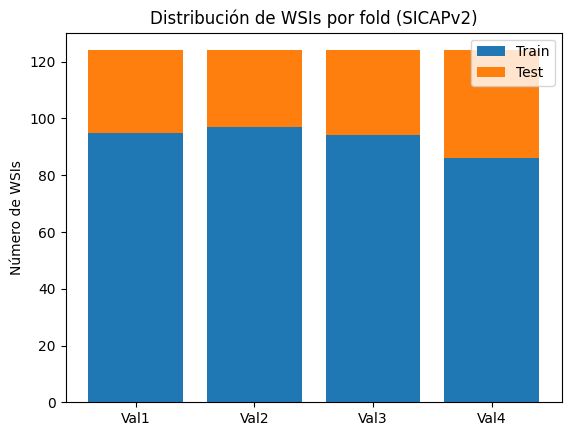

In [ ]:
import matplotlib.pyplot as plt

folds = ["Val1", "Val2", "Val3", "Val4"]
trainWsis = [95, 97, 94, 86]
testWsis  = [29, 27, 30, 38]

x = range(len(folds))

plt.bar(x, trainWsis, label="Train")
plt.bar(x, testWsis, bottom=trainWsis, label="Test")
plt.xticks(x, folds)
plt.ylabel("Número de WSIs")
plt.title("Distribución de WSIs por fold (SICAPv2)")
plt.legend()
plt.show()


### **Nota**:
Las máscaras de segmentación están disponibles en SICAPv2, pero NO se utilizan para el entrenamiento del modelo MIL.

Se emplean únicamente para análisis exploratorio y validación interpretativa.

El dataset SICAPv2 proporciona un conjunto de particiones oficiales para validación cruzada (Val1–Val4), las cuales fueron empleadas para el desarrollo y evaluación de los modelos. Adicionalmente, el dataset incluye un conjunto de prueba independiente (partition/Test), el cual se reserva como test hold-out final y no se utiliza durante el proceso de ajuste ni selección de modelos

# **Sprint 2: Construcción del dataset_manifest.csv**

### **Objetivo del Sprint 2**

Construir un manifest único, consistente y trazable, donde:

- 1 fila = 1 parche
- Cada parche queda asociado a:
  * su WSI
  * su fold (Val1–Val4)
  * su split (train / test)
  * su ruta a imagen
  * su ruta a máscara
  * su label clínico global (WSI-level)

Este archivo será:
- la base de los bags MIL
- la fuente para EDA, entrenamiento y evaluación

## Esquema propuesto del `dataset_manifest.csv`

| Columna | Descripción |
| :--- | :--- |
| **imageName** | Nombre del parche |
| **imagePath** | Ruta absoluta o relativa a la imagen |
| **maskPath** | Ruta a la máscara correspondiente |
| **maskExists** | Indica si la máscara existe (True/False) |
| **wsiId** | Identificador único de la WSI |
| **fold** | Fold de validación cruzada (Val1–Val4) |
| **split** | Subconjunto: train / test |
| **gleasonPrimary** | Gleason Score primario a nivel WSI |
| **gleasonSecondary** | Gleason Score secundario a nivel WSI |
| **isup** | Grado ISUP derivado a partir de Gleason Primary + Secondary |
| **nc** | Parche no canceroso (Non-Cancerous) |
| **g3** | Gleason pattern 3 (patch-level) |
| **g4** | Gleason pattern 4 (patch-level) |
| **g5** | Gleason pattern 5 (patch-level) |
| **g4c** | Gleason pattern 4 cribriforme (subtipo agresivo) |


El grado ISUP se deriva una única vez a nivel WSI durante la carga de los labels clínicos, y posteriormente se propaga a todos los parches asociados a dicha WSI, garantizando coherencia WSI-level y evitando inconsistencias a nivel patch.



### Nota
Los labels NO son patch-level, solo se registran por trazabilidad.

## 2.1 Cargar labels globales (WSI-level)

In [ ]:
import pandas as pd
import os

wsiLabelsPath = os.path.join(DATASET_PATH, "wsi_labels.xlsx")
wsiLabelsDf = pd.read_excel(wsiLabelsPath)
wsiLabelsDf.head()


,slide_id,patient_id,Gleason_primary,Gleason_secondary
0,16B0001851,667360,4,5
1,16B0003388,325687,4,4
2,16B0003394,747184,3,3
3,16B0006668,14107,5,5
4,16B0006669,14107,5,5


In [ ]:
wsiLabelsDf.columns

Index(['slide_id', 'patient_id', 'Gleason_primary', 'Gleason_secondary'], dtype='object')

In [ ]:
wsiLabelsDf = wsiLabelsDf.rename(columns={
    "slide_id": "WSI_ID"
})

wsiLabelsDf.head()

,WSI_ID,patient_id,Gleason_primary,Gleason_secondary
0,16B0001851,667360,4,5
1,16B0003388,325687,4,4
2,16B0003394,747184,3,3
3,16B0006668,14107,5,5
4,16B0006669,14107,5,5


In [ ]:
wsiLabelsDf.columns

Index(['WSI_ID', 'patient_id', 'Gleason_primary', 'Gleason_secondary'], dtype='object')

## 2.2 Funciones auxiliares clave

In [ ]:
def extractWsiId(imageName: str) -> str:
    """
    Extrae el identificador de la WSI a partir del nombre del parche.
    """
    return imageName.split("_Block")[0]


In [ ]:
def buildImagePath(imageName):
    return os.path.join(IMAGES_DIR, imageName)

def buildMaskPath(imageName):
    return os.path.join(MASKS_DIR, imageName)


In [ ]:
def computeISUP(gleasonPrimary, gleasonSecondary):
    total = gleasonPrimary + gleasonSecondary

    if total <= 6:
        return 1
    elif total == 7 and gleasonPrimary == 3:
        return 2
    elif total == 7 and gleasonPrimary == 4:
        return 3
    elif total == 8:
        return 4
    else:
        return 5


## 2.3 Procesar un fold (función central)

### precalcular ISUP

In [ ]:
wsiLabelsDf["ISUP"] = wsiLabelsDf.apply(
    lambda r: computeISUP(r["Gleason_primary"], r["Gleason_secondary"]),
    axis=1
)

### Construir el diccionario clínico (YA con ISUP)

In [ ]:
wsiLabelDict = (
    wsiLabelsDf
    .set_index("WSI_ID")
    .to_dict(orient="index")
)


In [ ]:
def processFold(foldName):
    foldRows = []
    foldPath = os.path.join(PARTITION_DIR, "Validation", foldName)

    for split in ["Train", "Test"]:
        splitDf = pd.read_excel(os.path.join(foldPath, f"{split}.xlsx"))

        for _, row in splitDf.iterrows():
            imageName = row["image_name"]
            wsiId = extractWsiId(imageName)

            foldRows.append({
                "imageName": imageName,
                "imagePath": buildImagePath(imageName),
                "maskPath": buildMaskPath(imageName),
                "maskExists": os.path.exists(buildMaskPath(imageName)),
                "wsiId": wsiId,
                "fold": foldName,
                "split": split.lower(),

                # 🔒 Labels WSI-level (constantes)
                "gleasonPrimary": int(wsiLabelDict[wsiId]["Gleason_primary"]),
                "gleasonSecondary": int(wsiLabelDict[wsiId]["Gleason_secondary"]),
                "isup": int(wsiLabelDict[wsiId]["ISUP"]),

                # 🎯 Patch-level (desde partition)
                "nc": row["NC"],
                "g3": row["G3"],
                "g4": row["G4"],
                "g5": row["G5"],
                "g4c": row["G4C"],
            })

    return pd.DataFrame(foldRows)


## 2.4 Construcción completa del manifest

In [ ]:
allFolds = []

for fold in ["Val1", "Val2", "Val3", "Val4"]:
    print(f"Procesando {fold}...")
    allFolds.append(processFold(fold))

manifestDf = pd.concat(allFolds, ignore_index=True)
manifestDf.head()


Procesando Val1...
Procesando Val2...
Procesando Val3...
Procesando Val4...


,imageName,imagePath,maskPath,maskExists,wsiId,fold,split,gleasonPrimary,gleasonSecondary,isup,nc,g3,g4,g5,g4c
0,16B0001851_Block_Region_1_0_0_xini_6803_yini_5...,/content/sicapv2_data/SICAPv2/images/16B000185...,/content/sicapv2_data/SICAPv2/masks/16B0001851...,True,16B0001851,Val1,train,4,5,5,0,0,0,1,0
1,16B0001851_Block_Region_1_0_1_xini_7827_yini_5...,/content/sicapv2_data/SICAPv2/images/16B000185...,/content/sicapv2_data/SICAPv2/masks/16B0001851...,True,16B0001851,Val1,train,4,5,5,0,0,0,1,0
2,16B0001851_Block_Region_1_0_2_xini_8851_yini_5...,/content/sicapv2_data/SICAPv2/images/16B000185...,/content/sicapv2_data/SICAPv2/masks/16B0001851...,True,16B0001851,Val1,train,4,5,5,0,0,0,1,0
3,16B0001851_Block_Region_1_0_3_xini_9875_yini_5...,/content/sicapv2_data/SICAPv2/images/16B000185...,/content/sicapv2_data/SICAPv2/masks/16B0001851...,True,16B0001851,Val1,train,4,5,5,0,0,0,1,0
4,16B0001851_Block_Region_1_1_0_xini_6803_yini_6...,/content/sicapv2_data/SICAPv2/images/16B000185...,/content/sicapv2_data/SICAPv2/masks/16B0001851...,True,16B0001851,Val1,train,4,5,5,0,0,0,1,0


## 2.5 Validaciones críticas

In [ ]:
manifestDf["isup"].apply(type).value_counts()

,count
isup,
<class 'int'>,39836


In [ ]:
manifestDf.groupby("wsiId")["isup"].nunique().max()

1

In [ ]:
manifestDf.shape

(39836, 15)

### Integridad de máscaras

In [ ]:
manifestDf["maskExists"].value_counts()

,count
maskExists,
True,39836


### Sin valores nulos

In [ ]:
manifestDf.isna().sum()


,0
imageName,0
imagePath,0
maskPath,0
maskExists,0
wsiId,0
fold,0
split,0
gleasonPrimary,0
gleasonSecondary,0
isup,0


### Coherencia WSI–fold

In [ ]:
manifestDf.groupby(["fold", "split"])["wsiId"].nunique()

fold  split
Val1  test     29
      train    95
Val2  test     27
      train    97
Val3  test     30
      train    94
Val4  test     38
      train    86
Name: wsiId, dtype: int64

## 2.6 Guardar el manifest

In [ ]:
manifestPath = os.path.join(META_PATH, "dataset_manifest.csv")
manifestDf.to_csv(manifestPath, index=False)

print("Manifest guardado en:", manifestPath)


Manifest guardado en: /content/sicapv2_data/SICAPv2/metadata/dataset_manifest.csv


Todas las validaciones críticas del manifest fueron superadas, incluyendo coherencia WSI-level de los labels clínicos, integridad de máscaras, ausencia de valores nulos y correcta separación por fold y split. El archivo dataset_manifest.csv se considera estable y se utiliza como única fuente de verdad para los sprints posteriores.

# **Sprint 3 Preparación MIL (Bag Construction)**

## **Objetivo del Sprint 3**

Transformar el dataset_manifest.csv en una estructura de Bags MIL, donde:

- Bag = WSI
- Instancias = patches
- Label del bag = ISUP
- Separación estricta por fold y split

Este sprint no entrena modelos. Solo prepara datos correctamente.

In [ ]:
import pandas as pd

MANIFEST_PATH = "/content/sicapv2_data/SICAPv2/metadata/dataset_manifest.csv"

manifestDf = pd.read_csv(MANIFEST_PATH)

manifestDf.shape
manifestDf.head()


,imageName,imagePath,maskPath,maskExists,wsiId,fold,split,gleasonPrimary,gleasonSecondary,isup,nc,g3,g4,g5,g4c
0,16B0001851_Block_Region_1_0_0_xini_6803_yini_5...,/content/sicapv2_data/SICAPv2/images/16B000185...,/content/sicapv2_data/SICAPv2/masks/16B0001851...,True,16B0001851,Val1,train,4,5,5,0,0,0,1,0
1,16B0001851_Block_Region_1_0_1_xini_7827_yini_5...,/content/sicapv2_data/SICAPv2/images/16B000185...,/content/sicapv2_data/SICAPv2/masks/16B0001851...,True,16B0001851,Val1,train,4,5,5,0,0,0,1,0
2,16B0001851_Block_Region_1_0_2_xini_8851_yini_5...,/content/sicapv2_data/SICAPv2/images/16B000185...,/content/sicapv2_data/SICAPv2/masks/16B0001851...,True,16B0001851,Val1,train,4,5,5,0,0,0,1,0
3,16B0001851_Block_Region_1_0_3_xini_9875_yini_5...,/content/sicapv2_data/SICAPv2/images/16B000185...,/content/sicapv2_data/SICAPv2/masks/16B0001851...,True,16B0001851,Val1,train,4,5,5,0,0,0,1,0
4,16B0001851_Block_Region_1_1_0_xini_6803_yini_6...,/content/sicapv2_data/SICAPv2/images/16B000185...,/content/sicapv2_data/SICAPv2/masks/16B0001851...,True,16B0001851,Val1,train,4,5,5,0,0,0,1,0


## 3.2 Definición formal de un Bag MIL

A nivel conceptual:

- Un bag corresponde a una WSI y contiene múltiples instancias (***patches***).
- El bag hereda el label clínico de la WSI (ISUP), mientras que las instancias pueden tener etiquetas locales (***NC, G3, G4, G5, G4C***).

## 3.3 Construcción de Bags MIL

In [ ]:
from collections import defaultdict

def buildMilBags(manifestDf):
    bags = []

    grouped = manifestDf.groupby(["fold", "split", "wsiId"])

    for (fold, split, wsiId), group in grouped:

        bag = {
            "wsiId": wsiId,
            "fold": fold,
            "split": split,
            "isup": int(group["isup"].iloc[0]),
            "gleasonPrimary": int(group["gleasonPrimary"].iloc[0]),
            "gleasonSecondary": int(group["gleasonSecondary"].iloc[0]),
            "instances": []
        }

        for _, row in group.iterrows():
            instance = {
                "imagePath": row["imagePath"],
                "maskPath": row["maskPath"],
                "patchLabel": {
                    "nc": row["nc"],
                    "g3": row["g3"],
                    "g4": row["g4"],
                    "g5": row["g5"],
                    "g4c": row["g4c"]
                }
            }
            bag["instances"].append(instance)

        bags.append(bag)

    return bags


In [ ]:
milBags = buildMilBags(manifestDf)

len(milBags)


496

El número de bags debe coincidir con:

In [ ]:
manifestDf[["fold", "split", "wsiId"]].drop_duplicates().shape[0]


496

## 3.5 Validaciones críticas

In [ ]:
assert all(len(bag["instances"]) > 0 for bag in milBags)

## 3.5.2 Un bag no mezcla splits

In [ ]:
for bag in milBags:
    assert bag["split"] in ["train", "test"]


## 3.5.3 Un bag tiene un solo label ISUP

In [ ]:
for bag in milBags:
    assert isinstance(bag["isup"], int)


## 3.6 Estadísticas MIL

In [ ]:
import numpy as np

bagSizes = [len(bag["instances"]) for bag in milBags]

print("Número de bags:", len(milBags))
print("Instancias por bag (min):", np.min(bagSizes))
print("Instancias por bag (max):", np.max(bagSizes))
print("Instancias por bag (mean):", np.mean(bagSizes))


Número de bags: 496
Instancias por bag (min): 7
Instancias por bag (max): 347
Instancias por bag (mean): 80.31451612903226


## 3.7 Separación final por fold y split

In [ ]:
def splitBagsByFold(milBags, foldName):
    trainBags = [b for b in milBags if b["fold"] == foldName and b["split"] == "train"]
    testBags  = [b for b in milBags if b["fold"] == foldName and b["split"] == "test"]
    return trainBags, testBags


In [ ]:
trainVal1, testVal1 = splitBagsByFold(milBags, "Val1")

len(trainVal1), len(testVal1)


(95, 29)

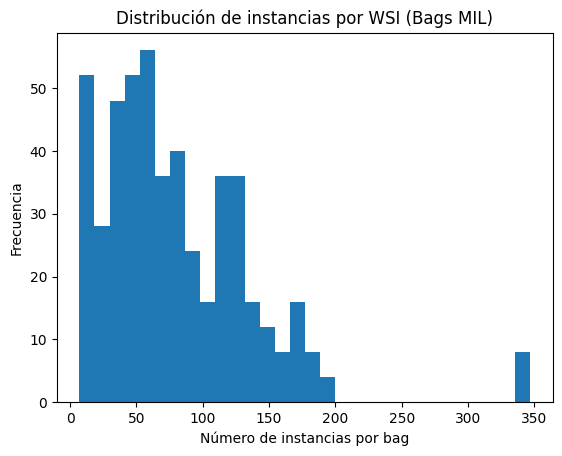

In [ ]:
bagSizes = [len(bag["instances"]) for bag in milBags]

plt.figure()
plt.hist(bagSizes, bins=30)
plt.xlabel("Número de instancias por bag")
plt.ylabel("Frecuencia")
plt.title("Distribución de instancias por WSI (Bags MIL)")
plt.show()

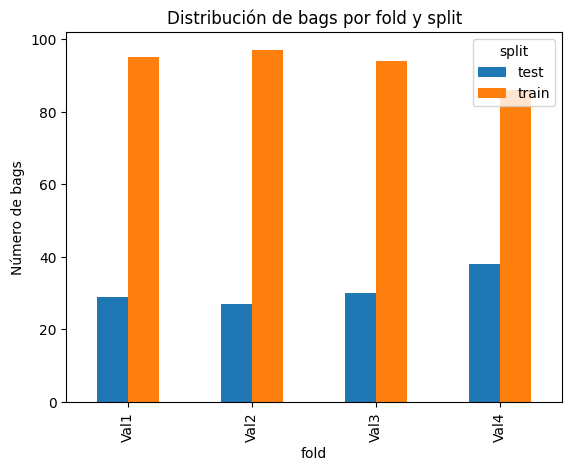

In [ ]:
bagsDf = pd.DataFrame([
    {"fold": b["fold"], "split": b["split"]}
    for b in milBags
])

bagsDf.groupby(["fold", "split"]).size().unstack().plot(kind="bar")
plt.ylabel("Número de bags")
plt.title("Distribución de bags por fold y split")
plt.show()


## **Construcción y validación de Bags MIL**

A partir del dataset_manifest.csv, se construyó una representación basada en Aprendizaje de Instancias Múltiples (MIL), donde cada Whole Slide Image (WSI) corresponde a un bag y cada parche histopatológico a una instancia. El label clínico del bag se definió a partir del grado ISUP asociado a la WSI, mientras que las instancias conservan información local relacionada con la distribución de patrones histológicos (NC, G3, G4, G5 y G4C).

Se validó que:

- Cada bag contiene exclusivamente instancias pertenecientes a una única WSI.
- No existe solapamiento entre conjuntos de entrenamiento y prueba.
- Todos los bags presentan un único label ISUP.
- No existen instancias huérfanas ni bags vacíos.

El conjunto final contiene $496$ bags, con un número variable de instancias por bag, lo cual refleja la heterogeneidad espacial propia de las imágenes histopatológicas y justifica el uso de modelos MIL con mecanismos de agregación basados en atención.

# **Sprint 4: Modelado MIL Binario, Benchmarking y Evaluación Clínica**

## **Objetivo**

Entrenar y comparar modelos de Multiple Instance Learning (MIL) binarios
(Mean Pooling, Max Pooling, ABMIL y SmABMIL) a nivel de Whole Slide Image (WSI),
utilizando embeddings de parches extraídos mediante una CNN preentrenada.

El sprint incluye benchmarking cuantitativo, evaluación clínica
y análisis de interpretabilidad basado en mecanismos de atención
a nivel de instancia.


## **1. Decisiones metodológicas (justificación técnica)**

### 1.1 Backbone CNN

- Arquitectura: ResNet50 preentrenada en ImageNet
- Pesos: preentrenada en ImageNet

Justificación (tesis-ready):
  - Arquitectura profunda con bloques residuales que facilitan el entrenamiento estable
  - Amplio uso en tareas de histopatología digital
  - Buen equilibrio entre capacidad representacional y costo computacional
  - Frecuentemente utilizada como baseline en enfoques MIL

## **2. Estrategia de entrenamiento**

**Backbone congelado (feature extractor)**

La red convolucional se utiliza únicamente como extractor de características:
  - No se realiza fine-tuning en esta etapa
  - Todos los parámetros del backbone permanecen congelados

Razones:
  - Dataset relativamente pequeño en número de WSIs
  - Riesgo alto de sobreajuste
  - Práctica estándar en pipelines MIL para histopatología

## **A. Dataset y trazabilidad**

### 4.A.1 Cargar bags MIL desde Sprint 3

In [ ]:
MANIFEST_PATH = "/content/sicapv2_data/SICAPv2/metadata/dataset_manifest.csv"
manifestDf = pd.read_csv(MANIFEST_PATH)

print("Total patches:", len(manifestDf))
print("Total WSIs:", manifestDf["wsiId"].nunique())


Total patches: 39836
Total WSIs: 124


### 4.A.2 Estadísticas clave del dataset

In [ ]:
# ISUP original
isupDist = manifestDf.drop_duplicates("wsiId")["isup"].value_counts().sort_index()

# Binarización (decisión explícita)
# ISUP >= 2 → cáncer clínicamente significativo
wsiDf = manifestDf.drop_duplicates("wsiId").copy()
wsiDf["labelBinary"] = (wsiDf["isup"] >= 2).astype(int)

binaryDist = wsiDf["labelBinary"].value_counts()

isupDist, binaryDist


(isup
 1    41
 2    16
 3    19
 4    15
 5    33
 Name: count, dtype: int64,
 labelBinary
 1    83
 0    41
 Name: count, dtype: int64)

### 4.A.3 Tamaño de bags (parches por WSI)

Bags (WSIs): 124
Patches por bag:
  min : 28
  max : 1388
  mean: 321.26


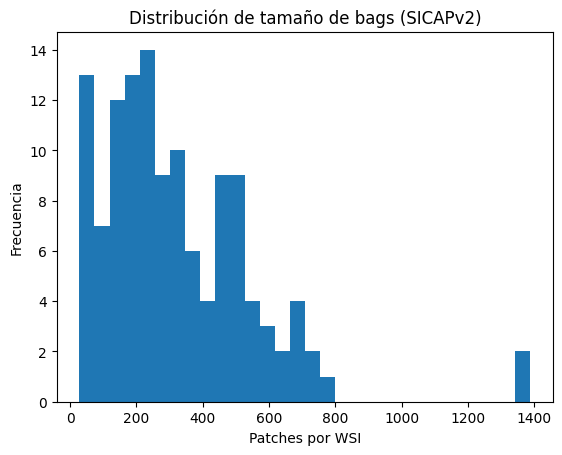

In [ ]:
bagSizes = manifestDf.groupby("wsiId").size()

print("Bags (WSIs):", bagSizes.shape[0])
print("Patches por bag:")
print("  min :", bagSizes.min())
print("  max :", bagSizes.max())
print("  mean:", round(bagSizes.mean(), 2))

plt.hist(bagSizes, bins=30)
plt.xlabel("Patches por WSI")
plt.ylabel("Frecuencia")
plt.title("Distribución de tamaño de bags (SICAPv2)")
plt.show()


## **B. Feature Extraction (ResNet50 congelada)**

### 4.B.1 Dataset de parches (PyTorch)

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import os

In [ ]:
class PatchDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img = Image.open(row["imagePath"]).convert("RGB")

        if self.transform:
            img = self.transform(img)

        return img, row["wsiId"]


### 4.B.2 Transforms y backbone

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std =[0.229, 0.224, 0.225]
    )
])

backbone = models.resnet50(pretrained=True)
backbone.fc = torch.nn.Identity()
backbone = backbone.to(device)
backbone.eval()


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:01<00:00, 68.9MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### 4.B.3 Extraer embeddings por fold

In [ ]:
def extractEmbeddings(df, batchSize=64):
    dataset = PatchDataset(df, transform)
    loader = DataLoader(dataset, batch_size=batchSize, shuffle=False)

    features = {}
    with torch.no_grad():
        for imgs, wsiIds in loader:
            imgs = imgs.to(device)
            emb = backbone(imgs).cpu().numpy()

            for e, wsi in zip(emb, wsiIds):
                features.setdefault(wsi, []).append(e)

    return {k: np.stack(v) for k, v in features.items()}


## **C. Modelos MIL y Benchmarking**

### 4.C.1 Definición de modelos MIL

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

#### Mean Pooling MIL

In [ ]:
class MeanPoolingMIL(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.fc = nn.Linear(dim, 1)

    def forward(self, x):
        return self.fc(x.mean(dim=0))


#### Max Pooling MIL

In [ ]:
class MaxPoolingMIL(nn.Module):
    def __init__(self, inputDim):
        super().__init__()
        self.classifier = nn.Linear(inputDim, 1)

    def forward(self, x):
        x, _ = x.max(dim=0)
        return self.classifier(x)


#### ABMIL (Attention-Based MIL)

In [ ]:
class ABMIL(nn.Module):
    def __init__(self, dim, hidden=256):
        super().__init__()
        self.att = nn.Sequential(
            nn.Linear(dim, hidden),
            nn.Tanh(),
            nn.Linear(hidden, 1)
        )
        self.fc = nn.Linear(dim, 1)

    def forward(self, x):
        A = torch.softmax(self.att(x), dim=0)
        M = torch.sum(A * x, dim=0)
        return self.fc(M), A


#### SmABMIL (Gated Attention)

In [ ]:
class SmABMIL(nn.Module):
    def __init__(self, dim, hidden=256):
        super().__init__()
        self.V = nn.Linear(dim, hidden)
        self.U = nn.Linear(dim, hidden)
        self.W = nn.Linear(hidden, 1)
        self.fc = nn.Linear(dim, 1)

    def forward(self, x):
        A = torch.tanh(self.V(x)) * torch.sigmoid(self.U(x))
        A = torch.softmax(self.W(A), dim=0)
        M = torch.sum(A * x, dim=0)
        return self.fc(M), A


## **D. Entrenamiento + Evaluación Clínica**

### 4.D.1 Métricas clínicas

In [ ]:
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score,
    confusion_matrix, roc_auc_score, f1_score
)

In [ ]:
def evaluate(model, bags, labels):
    yTrue, yPred, yProb = [], [], []

    model.eval()
    with torch.no_grad():
        for bag, y in zip(bags, labels):
            bag = bag.to(device)  # ✅ FIX CRÍTICO

            out = model(bag)
            if isinstance(out, tuple):
                out = out[0]

            p = torch.sigmoid(out).item()

            yTrue.append(y)
            yPred.append(int(p >= 0.5))
            yProb.append(p)

    return {
        "accuracy": accuracy_score(yTrue, yPred),
        "sensitivity": recall_score(yTrue, yPred),
        "specificity": recall_score(yTrue, yPred, pos_label=0),
        "precision": precision_score(yTrue, yPred),
        "f1": f1_score(yTrue, yPred),
        "auc": roc_auc_score(yTrue, yProb),
        "confusion": confusion_matrix(yTrue, yPred)
    }


### 4.D.2 Loop completo por fold (benchmarking real)

In [ ]:
from tqdm.auto import tqdm

EPOCHS = 10
LR = 1e-4
LOSS = nn.BCEWithLogitsLoss()

results = []
trainingLogs = []
trainedModels = {}

for fold in ["Val1", "Val2", "Val3", "Val4"]:
    print(f"\n==============================")
    print(f"        FOLD {fold}")
    print(f"==============================")

    # Split por fold
    dfTrain = manifestDf[(manifestDf.fold == fold) & (manifestDf.split == "train")]
    dfTest  = manifestDf[(manifestDf.fold == fold) & (manifestDf.split == "test")]

    # Embeddings
    embTrain = extractEmbeddings(dfTrain)
    embTest  = extractEmbeddings(dfTest)

    # Construcción de bags
    trainBags, trainLabels = [], []
    for wsi, emb in embTrain.items():
        y = int(wsiDf.loc[wsiDf.wsiId == wsi, "labelBinary"].iloc[0])
        trainBags.append(torch.tensor(emb, dtype=torch.float32))
        trainLabels.append(y)

    testBags, testLabels = [], []
    for wsi, emb in embTest.items():
        y = int(wsiDf.loc[wsiDf.wsiId == wsi, "labelBinary"].iloc[0])
        testBags.append(torch.tensor(emb, dtype=torch.float32))
        testLabels.append(y)

    # Modelos a comparar
    for Model, name in [
        (MeanPoolingMIL, "MeanMIL"),
        (MaxPoolingMIL, "MaxMIL"),
        (ABMIL, "ABMIL"),
        (SmABMIL, "SmABMIL")
    ]:
        print(f"\n▶ Entrenando modelo: {name}")

        model = Model(trainBags[0].shape[1]).to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=LR)

        # ===== Entrenamiento =====
        for epoch in range(EPOCHS):
            model.train()
            epochLoss = 0.0

            loop = tqdm(
                zip(trainBags, trainLabels),
                total=len(trainBags),
                leave=False,
                desc=f"{name} | Epoch {epoch+1}/{EPOCHS}"
            )

            for bag, y in loop:
                bag = bag.to(device)
                target = torch.tensor([float(y)], device=device)

                optimizer.zero_grad()
                out = model(bag)
                if isinstance(out, tuple):
                    out = out[0]

                loss = LOSS(out, target)
                loss.backward()
                optimizer.step()

                epochLoss += loss.item()
                loop.set_postfix(loss=loss.item())

            avgLoss = epochLoss / len(trainBags)

            trainingLogs.append({
                "fold": fold,
                "model": name,
                "epoch": epoch + 1,
                "loss": avgLoss
            })

            print(f"    Epoch [{epoch+1}/{EPOCHS}] - Avg Loss: {avgLoss:.4f}")

        # GUARDAMOS EL MODELO
        trainedModels[(name, fold)] = model

        # ===== Evaluación clínica =====
        metrics = evaluate(model, testBags, testLabels)
        metrics["model"] = name
        metrics["fold"] = fold
        results.append(metrics)

        print(
            f"✔ Evaluación {name} | Fold {fold}\n"
            f"  Acc: {metrics['accuracy']:.3f} | "
            f"Sens: {metrics['sensitivity']:.3f} | "
            f"Spec: {metrics['specificity']:.3f} | "
            f"AUC: {metrics['auc']:.3f}"
        )



        FOLD Val1

▶ Entrenando modelo: MeanMIL


MeanMIL | Epoch 1/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [1/10] - Avg Loss: 0.7415


MeanMIL | Epoch 2/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [2/10] - Avg Loss: 0.7467


MeanMIL | Epoch 3/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [3/10] - Avg Loss: 0.7231


MeanMIL | Epoch 4/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [4/10] - Avg Loss: 0.6982


MeanMIL | Epoch 5/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [5/10] - Avg Loss: 0.6754


MeanMIL | Epoch 6/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [6/10] - Avg Loss: 0.6545


MeanMIL | Epoch 7/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [7/10] - Avg Loss: 0.6354


MeanMIL | Epoch 8/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [8/10] - Avg Loss: 0.6177


MeanMIL | Epoch 9/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [9/10] - Avg Loss: 0.6015


MeanMIL | Epoch 10/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [10/10] - Avg Loss: 0.5865
✔ Evaluación MeanMIL | Fold Val1
  Acc: 0.690 | Sens: 0.625 | Spec: 1.000 | AUC: 0.850

▶ Entrenando modelo: MaxMIL


MaxMIL | Epoch 1/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [1/10] - Avg Loss: 0.6769


MaxMIL | Epoch 2/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [2/10] - Avg Loss: 0.8786


MaxMIL | Epoch 3/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [3/10] - Avg Loss: 0.8161


MaxMIL | Epoch 4/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [4/10] - Avg Loss: 0.7728


MaxMIL | Epoch 5/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [5/10] - Avg Loss: 0.7360


MaxMIL | Epoch 6/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [6/10] - Avg Loss: 0.7036


MaxMIL | Epoch 7/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [7/10] - Avg Loss: 0.6745


MaxMIL | Epoch 8/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [8/10] - Avg Loss: 0.6485


MaxMIL | Epoch 9/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [9/10] - Avg Loss: 0.6250


MaxMIL | Epoch 10/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [10/10] - Avg Loss: 0.6038
✔ Evaluación MaxMIL | Fold Val1
  Acc: 0.172 | Sens: 0.000 | Spec: 1.000 | AUC: 0.942

▶ Entrenando modelo: ABMIL


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ABMIL | Epoch 1/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [1/10] - Avg Loss: 0.7289


ABMIL | Epoch 2/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [2/10] - Avg Loss: 0.7328


ABMIL | Epoch 3/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [3/10] - Avg Loss: 0.6877


ABMIL | Epoch 4/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [4/10] - Avg Loss: 0.6354


ABMIL | Epoch 5/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [5/10] - Avg Loss: 0.5870


ABMIL | Epoch 6/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [6/10] - Avg Loss: 0.5332


ABMIL | Epoch 7/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [7/10] - Avg Loss: 0.4759


ABMIL | Epoch 8/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [8/10] - Avg Loss: 0.4286


ABMIL | Epoch 9/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [9/10] - Avg Loss: 0.3883


ABMIL | Epoch 10/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [10/10] - Avg Loss: 0.3557
✔ Evaluación ABMIL | Fold Val1
  Acc: 0.724 | Sens: 0.792 | Spec: 0.400 | AUC: 0.708

▶ Entrenando modelo: SmABMIL


SmABMIL | Epoch 1/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [1/10] - Avg Loss: 0.7435


SmABMIL | Epoch 2/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [2/10] - Avg Loss: 0.7486


SmABMIL | Epoch 3/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [3/10] - Avg Loss: 0.7205


SmABMIL | Epoch 4/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [4/10] - Avg Loss: 0.6919


SmABMIL | Epoch 5/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [5/10] - Avg Loss: 0.6598


SmABMIL | Epoch 6/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [6/10] - Avg Loss: 0.6185


SmABMIL | Epoch 7/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [7/10] - Avg Loss: 0.5649


SmABMIL | Epoch 8/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [8/10] - Avg Loss: 0.4981


SmABMIL | Epoch 9/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [9/10] - Avg Loss: 0.4364


SmABMIL | Epoch 10/10:   0%|          | 0/95 [00:00<?, ?it/s]

    Epoch [10/10] - Avg Loss: 0.3862
✔ Evaluación SmABMIL | Fold Val1
  Acc: 0.897 | Sens: 0.917 | Spec: 0.800 | AUC: 0.975

        FOLD Val2

▶ Entrenando modelo: MeanMIL


MeanMIL | Epoch 1/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [1/10] - Avg Loss: 0.7458


MeanMIL | Epoch 2/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [2/10] - Avg Loss: 0.7336


MeanMIL | Epoch 3/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [3/10] - Avg Loss: 0.7142


MeanMIL | Epoch 4/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [4/10] - Avg Loss: 0.6925


MeanMIL | Epoch 5/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [5/10] - Avg Loss: 0.6724


MeanMIL | Epoch 6/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [6/10] - Avg Loss: 0.6538


MeanMIL | Epoch 7/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [7/10] - Avg Loss: 0.6364


MeanMIL | Epoch 8/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [8/10] - Avg Loss: 0.6202


MeanMIL | Epoch 9/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [9/10] - Avg Loss: 0.6051


MeanMIL | Epoch 10/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [10/10] - Avg Loss: 0.5910
✔ Evaluación MeanMIL | Fold Val2
  Acc: 0.815 | Sens: 0.850 | Spec: 0.714 | AUC: 0.914

▶ Entrenando modelo: MaxMIL


MaxMIL | Epoch 1/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [1/10] - Avg Loss: 0.6416


MaxMIL | Epoch 2/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [2/10] - Avg Loss: 0.8720


MaxMIL | Epoch 3/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [3/10] - Avg Loss: 0.8070


MaxMIL | Epoch 4/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [4/10] - Avg Loss: 0.7687


MaxMIL | Epoch 5/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [5/10] - Avg Loss: 0.7367


MaxMIL | Epoch 6/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [6/10] - Avg Loss: 0.7085


MaxMIL | Epoch 7/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [7/10] - Avg Loss: 0.6829


MaxMIL | Epoch 8/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [8/10] - Avg Loss: 0.6597


MaxMIL | Epoch 9/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [9/10] - Avg Loss: 0.6385


MaxMIL | Epoch 10/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [10/10] - Avg Loss: 0.6190
✔ Evaluación MaxMIL | Fold Val2
  Acc: 0.296 | Sens: 0.050 | Spec: 1.000 | AUC: 0.900

▶ Entrenando modelo: ABMIL


ABMIL | Epoch 1/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [1/10] - Avg Loss: 0.7361


ABMIL | Epoch 2/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [2/10] - Avg Loss: 0.7257


ABMIL | Epoch 3/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [3/10] - Avg Loss: 0.6812


ABMIL | Epoch 4/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [4/10] - Avg Loss: 0.6360


ABMIL | Epoch 5/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [5/10] - Avg Loss: 0.5930


ABMIL | Epoch 6/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [6/10] - Avg Loss: 0.5489


ABMIL | Epoch 7/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [7/10] - Avg Loss: 0.5042


ABMIL | Epoch 8/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [8/10] - Avg Loss: 0.4621


ABMIL | Epoch 9/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [9/10] - Avg Loss: 0.4162


ABMIL | Epoch 10/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [10/10] - Avg Loss: 0.3712
✔ Evaluación ABMIL | Fold Val2
  Acc: 0.815 | Sens: 0.900 | Spec: 0.571 | AUC: 0.836

▶ Entrenando modelo: SmABMIL


SmABMIL | Epoch 1/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [1/10] - Avg Loss: 0.7326


SmABMIL | Epoch 2/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [2/10] - Avg Loss: 0.7309


SmABMIL | Epoch 3/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [3/10] - Avg Loss: 0.7090


SmABMIL | Epoch 4/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [4/10] - Avg Loss: 0.6873


SmABMIL | Epoch 5/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [5/10] - Avg Loss: 0.6631


SmABMIL | Epoch 6/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [6/10] - Avg Loss: 0.6309


SmABMIL | Epoch 7/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [7/10] - Avg Loss: 0.5938


SmABMIL | Epoch 8/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [8/10] - Avg Loss: 0.5513


SmABMIL | Epoch 9/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [9/10] - Avg Loss: 0.5060


SmABMIL | Epoch 10/10:   0%|          | 0/97 [00:00<?, ?it/s]

    Epoch [10/10] - Avg Loss: 0.4616
✔ Evaluación SmABMIL | Fold Val2
  Acc: 0.889 | Sens: 0.950 | Spec: 0.714 | AUC: 0.886

        FOLD Val3

▶ Entrenando modelo: MeanMIL


MeanMIL | Epoch 1/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [1/10] - Avg Loss: 0.6966


MeanMIL | Epoch 2/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [2/10] - Avg Loss: 0.6602


MeanMIL | Epoch 3/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [3/10] - Avg Loss: 0.6523


MeanMIL | Epoch 4/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [4/10] - Avg Loss: 0.6327


MeanMIL | Epoch 5/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [5/10] - Avg Loss: 0.6141


MeanMIL | Epoch 6/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [6/10] - Avg Loss: 0.5967


MeanMIL | Epoch 7/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [7/10] - Avg Loss: 0.5803


MeanMIL | Epoch 8/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [8/10] - Avg Loss: 0.5649


MeanMIL | Epoch 9/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [9/10] - Avg Loss: 0.5503


MeanMIL | Epoch 10/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [10/10] - Avg Loss: 0.5365
✔ Evaluación MeanMIL | Fold Val3
  Acc: 0.600 | Sens: 0.786 | Spec: 0.438 | AUC: 0.661

▶ Entrenando modelo: MaxMIL


MaxMIL | Epoch 1/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [1/10] - Avg Loss: 0.6199


MaxMIL | Epoch 2/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [2/10] - Avg Loss: 0.8491


MaxMIL | Epoch 3/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [3/10] - Avg Loss: 0.7767


MaxMIL | Epoch 4/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [4/10] - Avg Loss: 0.7395


MaxMIL | Epoch 5/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [5/10] - Avg Loss: 0.7081


MaxMIL | Epoch 6/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [6/10] - Avg Loss: 0.6799


MaxMIL | Epoch 7/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [7/10] - Avg Loss: 0.6540


MaxMIL | Epoch 8/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [8/10] - Avg Loss: 0.6299


MaxMIL | Epoch 9/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [9/10] - Avg Loss: 0.6075


MaxMIL | Epoch 10/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [10/10] - Avg Loss: 0.5866
✔ Evaluación MaxMIL | Fold Val3
  Acc: 0.600 | Sens: 0.143 | Spec: 1.000 | AUC: 0.612

▶ Entrenando modelo: ABMIL


ABMIL | Epoch 1/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [1/10] - Avg Loss: 0.6585


ABMIL | Epoch 2/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [2/10] - Avg Loss: 0.6324


ABMIL | Epoch 3/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [3/10] - Avg Loss: 0.6068


ABMIL | Epoch 4/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [4/10] - Avg Loss: 0.5510


ABMIL | Epoch 5/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [5/10] - Avg Loss: 0.4812


ABMIL | Epoch 6/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [6/10] - Avg Loss: 0.4134


ABMIL | Epoch 7/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [7/10] - Avg Loss: 0.3472


ABMIL | Epoch 8/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [8/10] - Avg Loss: 0.2977


ABMIL | Epoch 9/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [9/10] - Avg Loss: 0.2510


ABMIL | Epoch 10/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [10/10] - Avg Loss: 0.2116
✔ Evaluación ABMIL | Fold Val3
  Acc: 0.633 | Sens: 0.786 | Spec: 0.500 | AUC: 0.661

▶ Entrenando modelo: SmABMIL


SmABMIL | Epoch 1/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [1/10] - Avg Loss: 0.6801


SmABMIL | Epoch 2/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [2/10] - Avg Loss: 0.6606


SmABMIL | Epoch 3/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [3/10] - Avg Loss: 0.6496


SmABMIL | Epoch 4/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [4/10] - Avg Loss: 0.6227


SmABMIL | Epoch 5/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [5/10] - Avg Loss: 0.5876


SmABMIL | Epoch 6/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [6/10] - Avg Loss: 0.5434


SmABMIL | Epoch 7/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [7/10] - Avg Loss: 0.4896


SmABMIL | Epoch 8/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [8/10] - Avg Loss: 0.4312


SmABMIL | Epoch 9/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [9/10] - Avg Loss: 0.3743


SmABMIL | Epoch 10/10:   0%|          | 0/94 [00:00<?, ?it/s]

    Epoch [10/10] - Avg Loss: 0.3110
✔ Evaluación SmABMIL | Fold Val3
  Acc: 0.633 | Sens: 0.786 | Spec: 0.500 | AUC: 0.746

        FOLD Val4

▶ Entrenando modelo: MeanMIL


MeanMIL | Epoch 1/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [1/10] - Avg Loss: 0.7277


MeanMIL | Epoch 2/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [2/10] - Avg Loss: 0.7056


MeanMIL | Epoch 3/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [3/10] - Avg Loss: 0.6930


MeanMIL | Epoch 4/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [4/10] - Avg Loss: 0.6749


MeanMIL | Epoch 5/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [5/10] - Avg Loss: 0.6578


MeanMIL | Epoch 6/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [6/10] - Avg Loss: 0.6417


MeanMIL | Epoch 7/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [7/10] - Avg Loss: 0.6265


MeanMIL | Epoch 8/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [8/10] - Avg Loss: 0.6120


MeanMIL | Epoch 9/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [9/10] - Avg Loss: 0.5984


MeanMIL | Epoch 10/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [10/10] - Avg Loss: 0.5854
✔ Evaluación MeanMIL | Fold Val4
  Acc: 0.711 | Sens: 1.000 | Spec: 0.154 | AUC: 0.975

▶ Entrenando modelo: MaxMIL


MaxMIL | Epoch 1/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [1/10] - Avg Loss: 0.7194


MaxMIL | Epoch 2/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [2/10] - Avg Loss: 0.8583


MaxMIL | Epoch 3/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [3/10] - Avg Loss: 0.8072


MaxMIL | Epoch 4/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [4/10] - Avg Loss: 0.7772


MaxMIL | Epoch 5/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [5/10] - Avg Loss: 0.7512


MaxMIL | Epoch 6/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [6/10] - Avg Loss: 0.7274


MaxMIL | Epoch 7/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [7/10] - Avg Loss: 0.7053


MaxMIL | Epoch 8/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [8/10] - Avg Loss: 0.6846


MaxMIL | Epoch 9/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [9/10] - Avg Loss: 0.6651


MaxMIL | Epoch 10/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [10/10] - Avg Loss: 0.6467
✔ Evaluación MaxMIL | Fold Val4
  Acc: 0.526 | Sens: 0.280 | Spec: 1.000 | AUC: 0.938

▶ Entrenando modelo: ABMIL


ABMIL | Epoch 1/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [1/10] - Avg Loss: 0.7236


ABMIL | Epoch 2/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [2/10] - Avg Loss: 0.7058


ABMIL | Epoch 3/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [3/10] - Avg Loss: 0.6809


ABMIL | Epoch 4/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [4/10] - Avg Loss: 0.6466


ABMIL | Epoch 5/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [5/10] - Avg Loss: 0.6088


ABMIL | Epoch 6/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [6/10] - Avg Loss: 0.5693


ABMIL | Epoch 7/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [7/10] - Avg Loss: 0.5265


ABMIL | Epoch 8/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [8/10] - Avg Loss: 0.4782


ABMIL | Epoch 9/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [9/10] - Avg Loss: 0.4236


ABMIL | Epoch 10/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [10/10] - Avg Loss: 0.3679
✔ Evaluación ABMIL | Fold Val4
  Acc: 0.842 | Sens: 0.920 | Spec: 0.692 | AUC: 0.945

▶ Entrenando modelo: SmABMIL


SmABMIL | Epoch 1/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [1/10] - Avg Loss: 0.7408


SmABMIL | Epoch 2/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [2/10] - Avg Loss: 0.7209


SmABMIL | Epoch 3/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [3/10] - Avg Loss: 0.7032


SmABMIL | Epoch 4/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [4/10] - Avg Loss: 0.6747


SmABMIL | Epoch 5/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [5/10] - Avg Loss: 0.6339


SmABMIL | Epoch 6/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [6/10] - Avg Loss: 0.5766


SmABMIL | Epoch 7/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [7/10] - Avg Loss: 0.5101


SmABMIL | Epoch 8/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [8/10] - Avg Loss: 0.4417


SmABMIL | Epoch 9/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [9/10] - Avg Loss: 0.3863


SmABMIL | Epoch 10/10:   0%|          | 0/86 [00:00<?, ?it/s]

    Epoch [10/10] - Avg Loss: 0.3318
✔ Evaluación SmABMIL | Fold Val4
  Acc: 0.711 | Sens: 0.960 | Spec: 0.231 | AUC: 0.818


## **E — Tabla clínica final**

In [ ]:
trainLogDf = pd.DataFrame(trainingLogs)
resultsDf  = pd.DataFrame(results)

In [ ]:
trainLogDf.head()

,fold,model,epoch,loss
0,Val1,MeanMIL,1,0.741477
1,Val1,MeanMIL,2,0.746654
2,Val1,MeanMIL,3,0.723136
3,Val1,MeanMIL,4,0.698154
4,Val1,MeanMIL,5,0.675387


In [ ]:
resultsDf.head()

,accuracy,sensitivity,specificity,precision,f1,auc,confusion,model,fold
0,0.689655,0.625000,1.000000,1.000000,0.769231,0.850000,"[[5, 0], [9, 15]]",MeanMIL,Val1
1,0.172414,0.000000,1.000000,0.000000,0.000000,0.941667,"[[5, 0], [24, 0]]",MaxMIL,Val1
2,0.724138,0.791667,0.400000,0.863636,0.826087,0.708333,"[[2, 3], [5, 19]]",ABMIL,Val1
3,0.896552,0.916667,0.800000,0.956522,0.936170,0.975000,"[[4, 1], [2, 22]]",SmABMIL,Val1
4,0.814815,0.850000,0.714286,0.894737,0.871795,0.914286,"[[5, 2], [3, 17]]",MeanMIL,Val2


### **Curva promedio de loss (promedio sobre folds)**

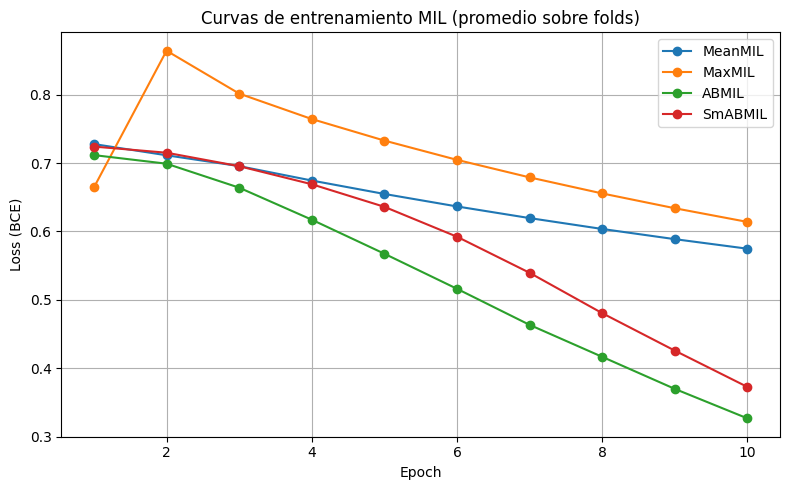

In [ ]:
plt.figure(figsize=(8, 5))

for modelName in trainLogDf["model"].unique():
    dfModel = (
        trainLogDf[trainLogDf.model == modelName]
        .groupby("epoch")["loss"]
        .mean()
    )
    plt.plot(dfModel.index, dfModel.values, marker="o", label=modelName)

plt.xlabel("Epoch")
plt.ylabel("Loss (BCE)")
plt.title("Curvas de entrenamiento MIL (promedio sobre folds)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### **Curvas por fold**

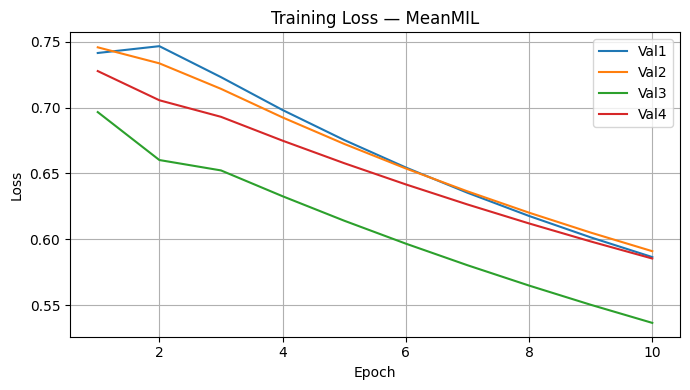

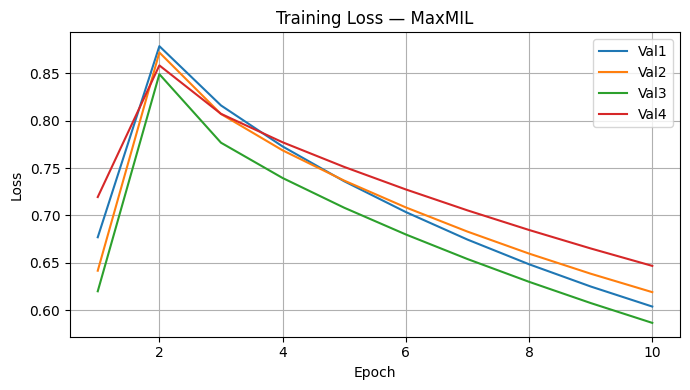

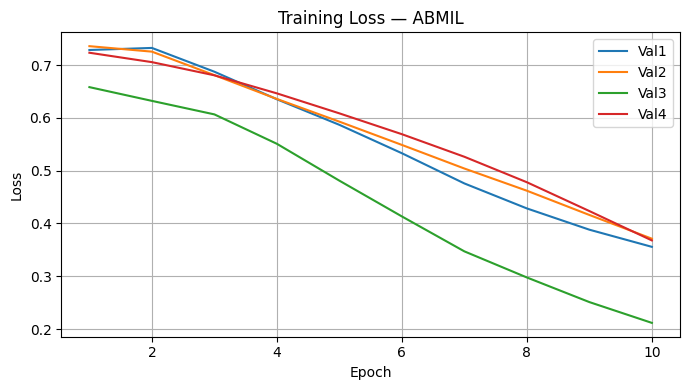

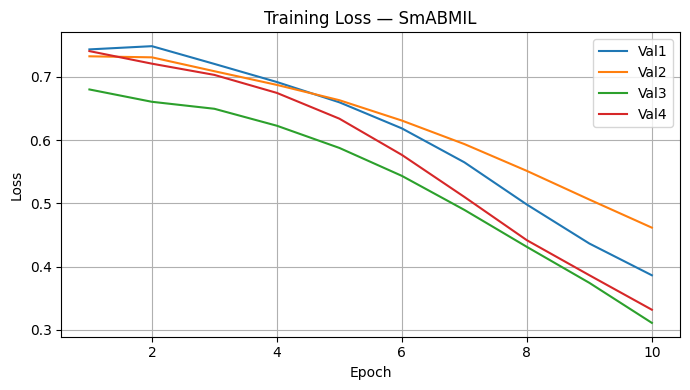

In [ ]:
for modelName in trainLogDf["model"].unique():
    plt.figure(figsize=(7,4))
    for fold in trainLogDf["fold"].unique():
        df = trainLogDf[
            (trainLogDf.model == modelName) &
            (trainLogDf.fold == fold)
        ]
        plt.plot(df.epoch, df.loss, label=fold)

    plt.title(f"Training Loss — {modelName}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### Tabla clinica

In [ ]:
metricCols = [
    "accuracy",
    "sensitivity",
    "specificity",
    "precision",
    "f1",
    "auc"
]

summary = (
    resultsDf[["model"] + metricCols]
    .groupby("model")
    .agg(["mean", "std"])
    .round(3)
)

summary

accuracy        sensitivity        specificity        precision  \
            mean    std        mean    std        mean    std      mean   
model                                                                     
ABMIL      0.754  0.095       0.849  0.071       0.541  0.123     0.788   
MaxMIL     0.399  0.199       0.118  0.123       1.000  0.000     0.750   
MeanMIL    0.704  0.088       0.815  0.155       0.576  0.363     0.785   
SmABMIL    0.782  0.131       0.903  0.080       0.561  0.254     0.787   

                   f1           auc         
           std   mean    std   mean    std  
model                                       
ABMIL    0.139  0.814  0.102  0.787  0.128  
MaxMIL   0.500  0.196  0.191  0.848  0.159  
MeanMIL  0.201  0.777  0.096  0.850  0.136  
SmABMIL  0.176  0.836  0.126  0.856  0.098

### Matriz de Confusion

In [ ]:
confusionRows = []

for _, row in resultsDf.iterrows():
    tn, fp, fn, tp = row["confusion"].ravel()

    confusionRows.append({
        "model": row["model"],
        "fold": row["fold"],
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "TP": tp
    })

confusionDf = pd.DataFrame(confusionRows)
confusionDf


,model,fold,TN,FP,FN,TP
0,MeanMIL,Val1,5,0,9,15
1,MaxMIL,Val1,5,0,24,0
2,ABMIL,Val1,2,3,5,19
3,SmABMIL,Val1,4,1,2,22
4,MeanMIL,Val2,5,2,3,17
5,MaxMIL,Val2,7,0,19,1
6,ABMIL,Val2,4,3,2,18
7,SmABMIL,Val2,5,2,1,19
8,MeanMIL,Val3,7,9,3,11
9,MaxMIL,Val3,16,0,12,2


In [ ]:
confusionSummary = (
    confusionDf
    .groupby("model")[["TN", "FP", "FN", "TP"]]
    .agg(["mean", "std"])
    .round(2)
)

confusionSummary


TN          FP           FN           TP      
          mean   std  mean   std   mean   std   mean   std
model                                                     
ABMIL     5.75  3.30  4.50  2.38   3.00  1.41  17.75  4.99
MaxMIL   10.25  5.12  0.00  0.00  18.25  4.92   2.50  3.11
MeanMIL   4.75  2.06  5.50  5.32   3.75  3.77  17.00  5.89
SmABMIL   5.00  2.16  5.25  4.43   1.75  0.96  19.00  5.72

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plotMeanConfusionMatrix(confusionSummary, modelName):
    meanVals = confusionSummary.loc[modelName].xs("mean", level=1)

    cm = np.array([
        [meanVals["TN"], meanVals["FP"]],
        [meanVals["FN"], meanVals["TP"]]
    ])

    plt.figure(figsize=(4.5, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt=".1f",
        cmap="Blues",
        xticklabels=["Benigno", "Maligno"],
        yticklabels=["Benigno", "Maligno"]
    )
    plt.xlabel("Predicción")
    plt.ylabel("Ground Truth")
    plt.title(f"Matriz de Confusión Promedio — {modelName}")
    plt.tight_layout()
    plt.show()


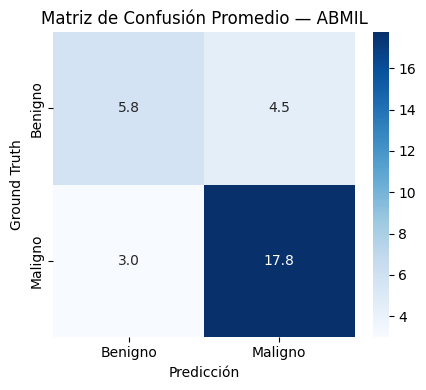

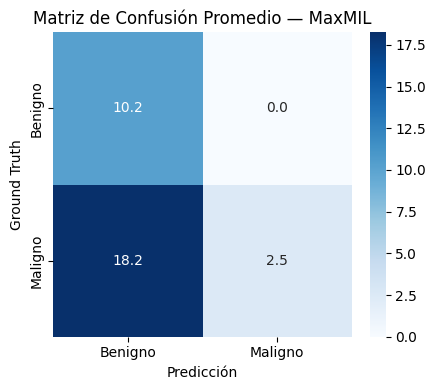

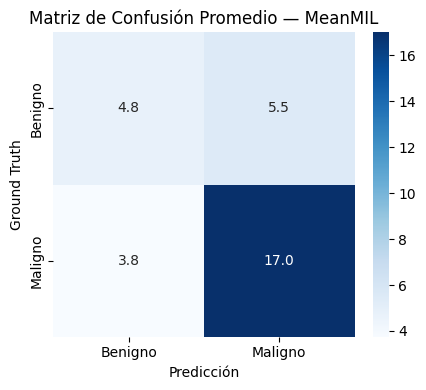

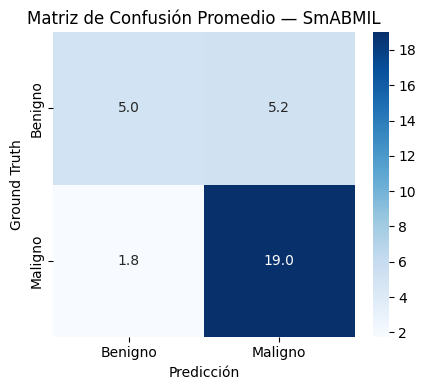

In [ ]:
for model in confusionSummary.index:
    plotMeanConfusionMatrix(confusionSummary, model)


### Boxplot de métricas clínicas por modelo

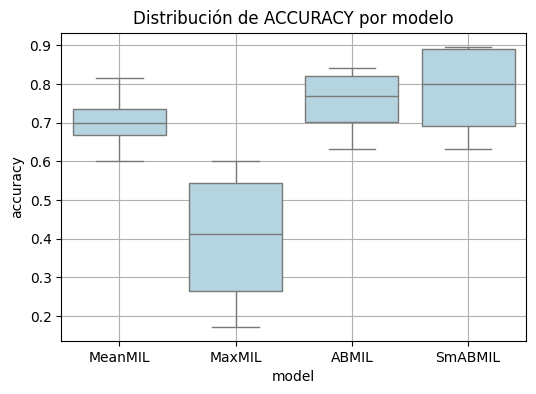

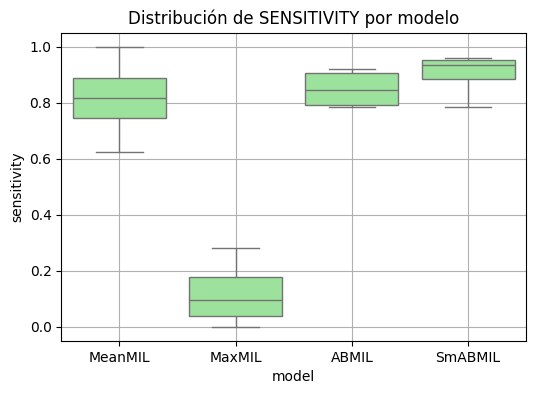

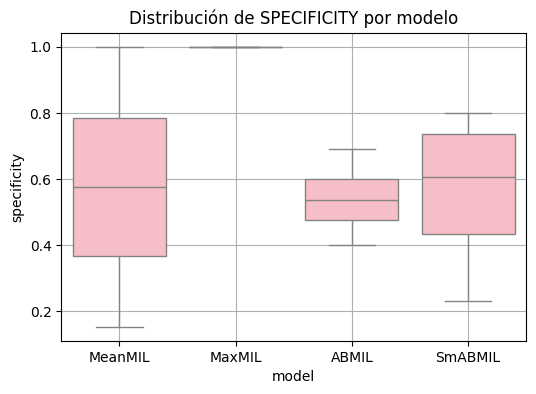

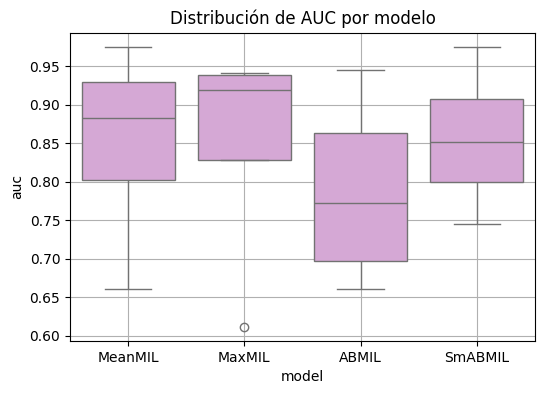

In [ ]:
metricsToPlot = ["accuracy", "sensitivity", "specificity", "auc"]
colors = ['#ADD8E6', '#90EE90', '#FFB6C1', '#DDA0DD'] # Lighter shades: LightBlue, LightGreen, LightPink, Plum

for i, metric in enumerate(metricsToPlot):
    plt.figure(figsize=(6,4))
    sns.boxplot(data=resultsDf, x="model", y=metric, color=colors[i]) # Use a different color for each metric
    plt.title(f"Distribución de {metric.upper()} por modelo")
    plt.grid(True)
    plt.show()

### Radar plot clínico

In [ ]:
from math import pi

def radarPlot(summary, model):
    metrics = ["accuracy", "sensitivity", "specificity", "precision", "f1", "auc"]
    # Correctly access 'mean' values from the MultiIndex columns
    values = summary.loc[model].xs('mean', level=1)[metrics].values.tolist()
    values += values[:1]

    angles = [n / float(len(metrics)) * 2 * pi for n in range(len(metrics))]
    angles += angles[:1]

    plt.figure(figsize=(5,5))
    ax = plt.subplot(111, polar=True)
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
    ax.set_title(f"Perfil clínico — {model}")
    plt.show()

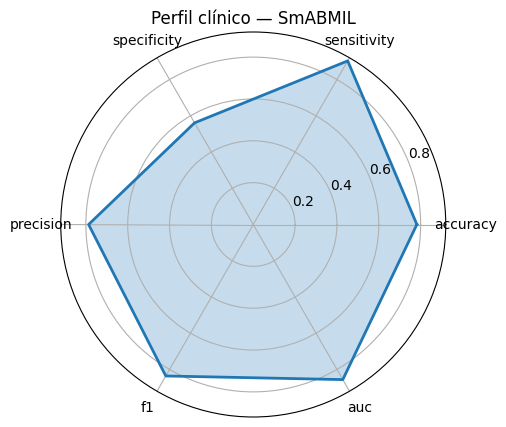

In [ ]:
radarPlot(summary, "SmABMIL")

In [ ]:
summary.to_csv("mil_metrics_summary.csv")
confusionSummary.to_csv("mil_confusion_summary.csv")
resultsDf.to_csv("mil_results_per_fold.csv", index=False)
trainLogDf.to_csv("mil_training_logs.csv", index=False)


## **F Interpretabilidad por atención (ABMIL / SmABMIL)**

### Visualizar pesos de atención

In [ ]:
def visualizeAttention(model, bag, topK=20):
    model.eval()

    bag = bag.to(device)

    with torch.no_grad():
        _, A = model(bag)   # atención
        A = A.squeeze().cpu().numpy()

    # Top parches con mayor atención
    idx = np.argsort(A)[::-1][:topK]

    plt.figure(figsize=(8, 4))
    plt.bar(range(topK), A[idx])
    plt.xlabel("Top patches")
    plt.ylabel("Attention weight")
    plt.title("Top-k Attention Weights per Bag (Instance-level MIL)")
    plt.grid(True)
    plt.show()

    return idx, A


In [ ]:
abmilModel   = trainedModels[("ABMIL", "Val1")]
smabmilModel = trainedModels[("SmABMIL", "Val1")]

positiveIdx = [i for i, y in enumerate(testLabels) if y == 1]

assert len(positiveIdx) > 0, "No positive bags in test set"

bagIdx = positiveIdx[0]
bag = testBags[bagIdx]



### Visualizar atención — ABMIL

ABMIL – Atención


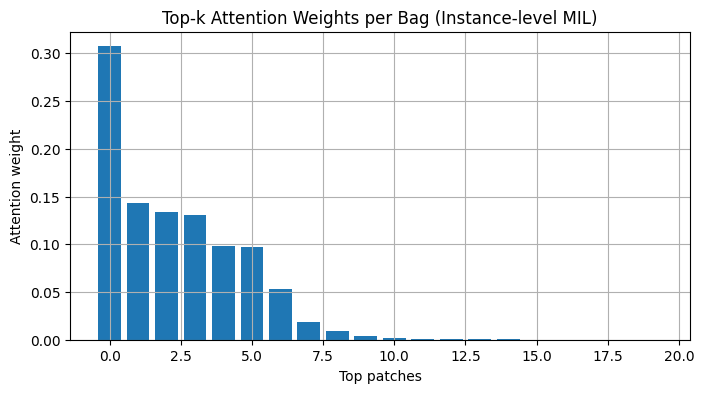

(array([29, 54, 58, 33, 57, 62, 47, 67, 36, 24, 25, 74, 53, 50, 40, 32, 21,
        17, 43, 68]),
 array([8.26985740e-07, 6.96577490e-06, 8.47663451e-09, 1.86374418e-08,
        3.52876157e-07, 1.56616142e-08, 2.18235542e-07, 6.36992695e-07,
        1.39202797e-07, 2.54535848e-07, 4.72726498e-08, 2.55903601e-08,
        2.16449098e-05, 3.89966448e-10, 1.79896560e-08, 8.17864566e-06,
        2.76443279e-06, 1.40695411e-04, 1.80632495e-10, 1.69419721e-07,
        8.63378318e-06, 1.48531588e-04, 1.15838716e-07, 7.72634507e-08,
        4.09511430e-03, 2.30001193e-03, 2.16131824e-07, 2.25351059e-07,
        1.72828561e-06, 3.07309836e-01, 8.53303650e-09, 4.87203833e-10,
        2.05080112e-04, 1.30214915e-01, 8.64403660e-09, 6.84672614e-07,
        8.74357019e-03, 1.05368500e-07, 1.09388097e-07, 2.21214922e-08,
        4.51650063e-04, 3.13386261e-10, 9.44861700e-09, 1.08275279e-04,
        2.22705552e-08, 7.80615217e-09, 3.69609529e-06, 5.31576835e-02,
        6.07316508e-08, 3.46611237e-08

In [ ]:
print("ABMIL – Atención")
visualizeAttention(abmilModel, bag)

### Visualizar atención — SmABMIL

SmABMIL – Atención suavizada


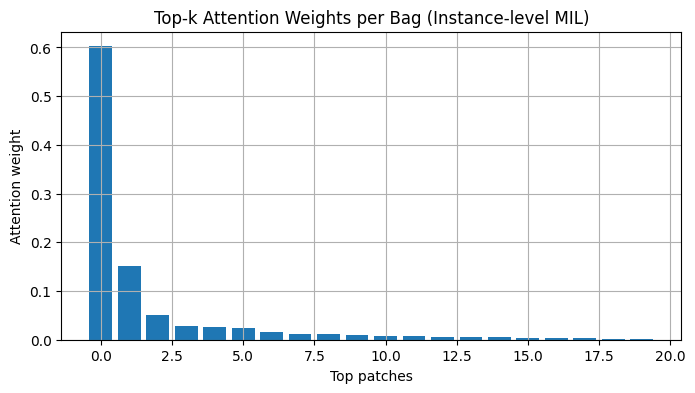

(array([53, 49, 23, 52, 61, 60, 65, 33, 66, 45, 28, 15, 29, 54,  4, 31, 67,
        50, 19,  2]),
 array([5.33844897e-08, 1.13538478e-03, 2.05745618e-03, 2.61384184e-06,
        5.19167120e-03, 4.73071805e-06, 4.83443873e-05, 5.31008118e-06,
        7.35726132e-07, 7.30695174e-05, 1.32828206e-03, 6.92020762e-07,
        2.42205459e-07, 1.22404535e-05, 2.51519377e-04, 8.22506193e-03,
        2.61426567e-06, 3.01117389e-08, 2.20210313e-05, 2.12578522e-03,
        2.82163586e-04, 4.24554507e-08, 1.01889484e-04, 5.13135269e-02,
        1.63991208e-05, 1.11976675e-07, 9.14665122e-07, 5.32658014e-04,
        8.44581705e-03, 5.64415148e-03, 3.53576906e-04, 4.40286892e-03,
        1.42357429e-03, 1.19822975e-02, 1.67487397e-05, 5.64457907e-04,
        3.06630932e-06, 1.42059607e-05, 4.52702225e-05, 1.53302986e-04,
        1.65209167e-05, 3.00723532e-05, 8.72499193e-04, 1.09675220e-05,
        2.23613170e-04, 1.03647821e-02, 2.05341887e-04, 7.70969709e-05,
        1.16796663e-03, 1.50590166e-01

In [ ]:
print("SmABMIL – Atención suavizada")
visualizeAttention(smabmilModel, bag)


## Visualizar TOP-K parches

In [ ]:
def getAttentionScores(model, bag):
    model.eval()
    bag = bag.to(device)

    with torch.no_grad():
        logits, A = model(bag)
        prob = torch.sigmoid(logits).item()
        A = A.squeeze().cpu().numpy()

    return A, prob


In [ ]:
def plotTopKAttentionBars(model, bag, topK=20, title="Top-K Attention Weights"):
    A, prob = getAttentionScores(model, bag)

    idx = np.argsort(A)[::-1][:topK]

    plt.figure(figsize=(8, 4))
    plt.bar(range(topK), A[idx])
    plt.xlabel("Top instances (patch embeddings)")
    plt.ylabel("Attention weight")
    plt.title(f"{title} | P(bag=1)={prob:.3f}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return idx


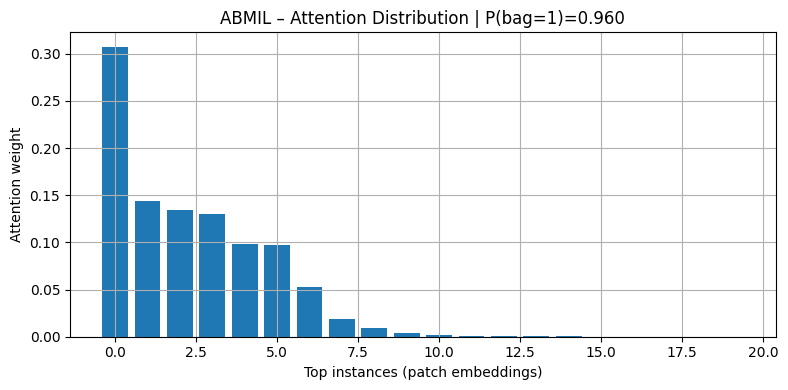

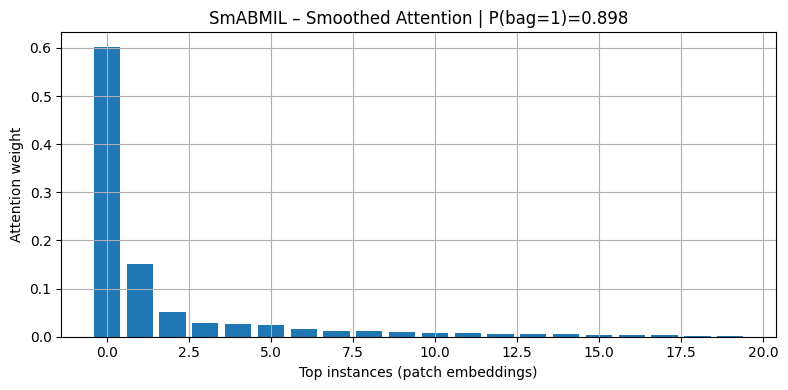

array([53, 49, 23, 52, 61, 60, 65, 33, 66, 45, 28, 15, 29, 54,  4, 31, 67,
       50, 19,  2])

In [ ]:
plotTopKAttentionBars(abmilModel, bag, title="ABMIL – Attention Distribution")
plotTopKAttentionBars(smabmilModel, bag, title="SmABMIL – Smoothed Attention")


In [ ]:
def plotAttentionHistogram(model, bag, title):
    A, _ = getAttentionScores(model, bag)

    plt.figure(figsize=(6,4))
    plt.hist(A, bins=30)
    plt.xlabel("Attention weight")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


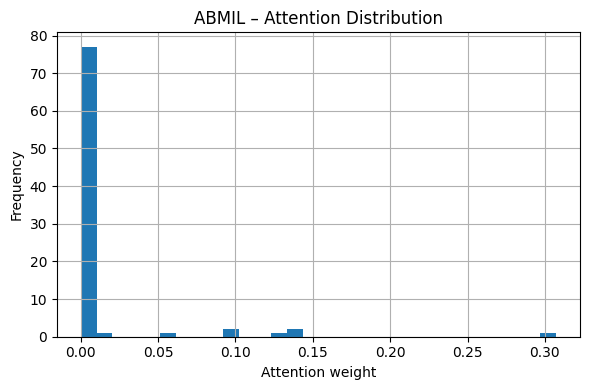

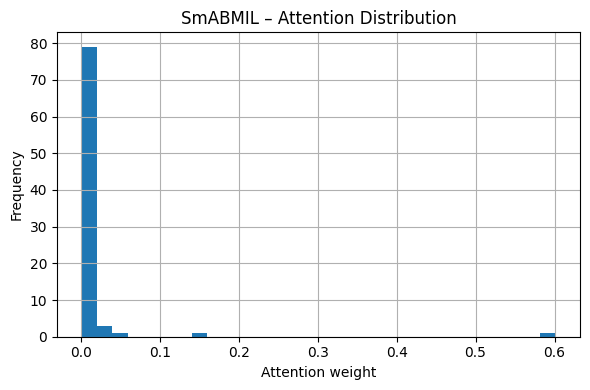

In [ ]:
plotAttentionHistogram(abmilModel, bag, "ABMIL – Attention Distribution")
plotAttentionHistogram(smabmilModel, bag, "SmABMIL – Attention Distribution")


# **Sprint 5: Interpretabilidad Visual y Correlato Histopatológico**

## Objetivo:
- Proyectar los pesos de atención aprendidos por modelos MIL basados en atención (ABMIL y SmABMIL) sobre el espacio histopatológico original, permitiendo la identificación de regiones tisulares relevantes y su correlato con patrones morfológicos clínicamente significativos.

## 5.A Reconstrucción del bag enriquecido

### 5.A.1 Función para construir un bag enriquecido

In [ ]:
def buildEnrichedBag(
    wsiId,
    manifestDf,
    backbone,
    transform,
    device,
    batchSize=64
):
    dfWsi = manifestDf[manifestDf.wsiId == wsiId].reset_index(drop=True)

    images = []
    coords  = []

    for _, row in dfWsi.iterrows():
        img = Image.open(row.imagePath).convert("RGB")
        images.append(img)
        coords.append([row.coordX, row.coordY])

    dataset = [
        transform(img) for img in images
    ]

    loader = DataLoader(
        dataset,
        batch_size=batchSize,
        shuffle=False
    )

    features = []

    backbone.eval()
    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            emb = backbone(batch).cpu()
            features.append(emb)

    features = torch.cat(features, dim=0)

    return {
        "features": features,                 # [N, D]
        "coords": torch.tensor(coords),        # [N, 2]
        "images": images,                      # list[PIL.Image]
        "wsiId": wsiId
    }


### 5.A.2 Construcción del bag

In [ ]:
wsiId = manifestDf[
    (manifestDf.fold == "Val1") &
    (manifestDf.split == "test")
]["wsiId"].iloc[0]

enrichedBag = buildEnrichedBag(
    wsiId=wsiId,
    manifestDf=manifestDf,
    backbone=backbone,
    transform=transform,
    device=device
)

print("Bag construido:")
print("Features:", enrichedBag["features"].shape)
print("Coords  :", enrichedBag["coords"].shape)
print("Images  :", len(enrichedBag["images"]))


Bag construido:
Features: torch.Size([280, 2048])
Coords  : torch.Size([280, 2])
Images  : 280


## 5.B Atención + Heatmap espacial sobre la WSI

### 5.B.1 Obtener atención desde ABMIL

In [ ]:
# ————— 5.B.1 Obtener atención desde ABMIL —————
abmilModel = trainedModels[("ABMIL", "Val1")]
abmilModel.eval()

with torch.no_grad():
    logits_ab, A_ab = abmilModel(enrichedBag["features"].to(device))
    attn_ab = A_ab.squeeze().cpu().numpy()
    prob_ab = torch.sigmoid(logits_ab).item()

print(f"P(WSI=Maligna) — ABMIL: {prob_ab:.3f}")

P(WSI=Maligna) — ABMIL: 0.808


### 5.B.2 Heatmap de atención espacial (figura tipo journal)

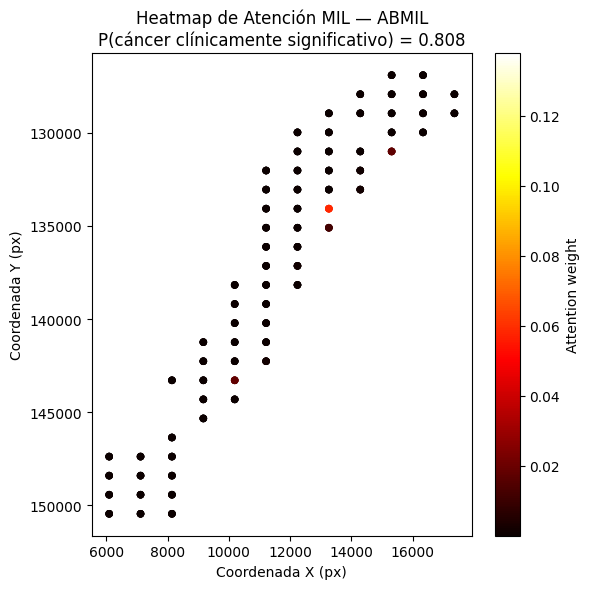

In [ ]:
coords = enrichedBag["coords"].numpy()

plt.figure(figsize=(6,6))
plt.scatter(
    coords[:,0], coords[:,1],
    c=attn_ab,
    cmap="hot",
    s=20
)
plt.colorbar(label="Attention weight")
plt.gca().invert_yaxis()
plt.title(
    f"Heatmap de Atención MIL — ABMIL\n"
    f"P(cáncer clínicamente significativo) = {prob_ab:.3f}"
)
plt.xlabel("Coordenada X (px)")
plt.ylabel("Coordenada Y (px)")
plt.tight_layout()
plt.show()

P(WSI=Maligna) — SmABMIL: 0.735


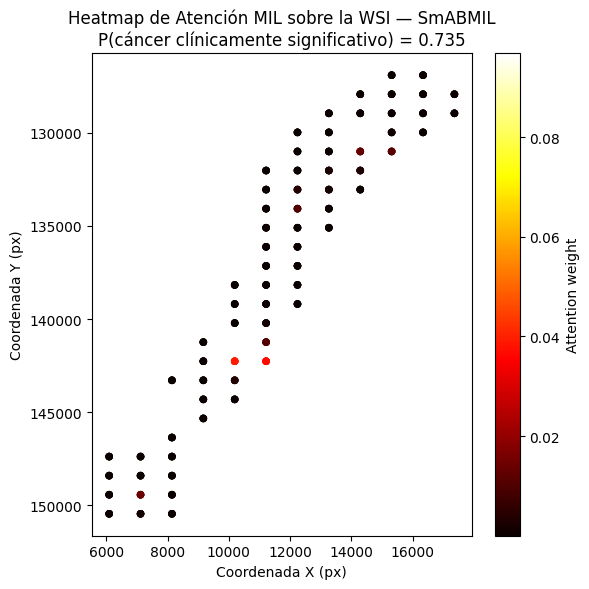

In [ ]:
# ————— 5.B.1 Obtener atención desde SmABMIL —————
smabmilModel = trainedModels[("SmABMIL", "Val1")]
smabmilModel.eval()
with torch.no_grad():
    logits, A = smabmilModel(enrichedBag["features"].to(device))
    attn = A.squeeze().cpu().numpy()
    prob = torch.sigmoid(logits).item()

print(f"P(WSI=Maligna) — SmABMIL: {prob:.3f}")

plt.figure(figsize=(6,6))
plt.scatter(
    coords[:,0], coords[:,1],
    c=attn,
    cmap="hot",
    s=20
)
plt.colorbar(label="Attention weight")
plt.gca().invert_yaxis()
plt.title(
    f"Heatmap de Atención MIL sobre la WSI — SmABMIL\n"
    f"P(cáncer clínicamente significativo) = {prob:.3f}"
)
plt.xlabel("Coordenada X (px)")
plt.ylabel("Coordenada Y (px)")
plt.tight_layout()
plt.show()

## 5.C — Top-K parches reales (evidencia visual)

### 5.C.1 Selección de parches más relevantes

In [ ]:
K = 9
idx = np.argsort(attn)[-K:][::-1]


### 5.C.2 Figura tipo journal (3×3)

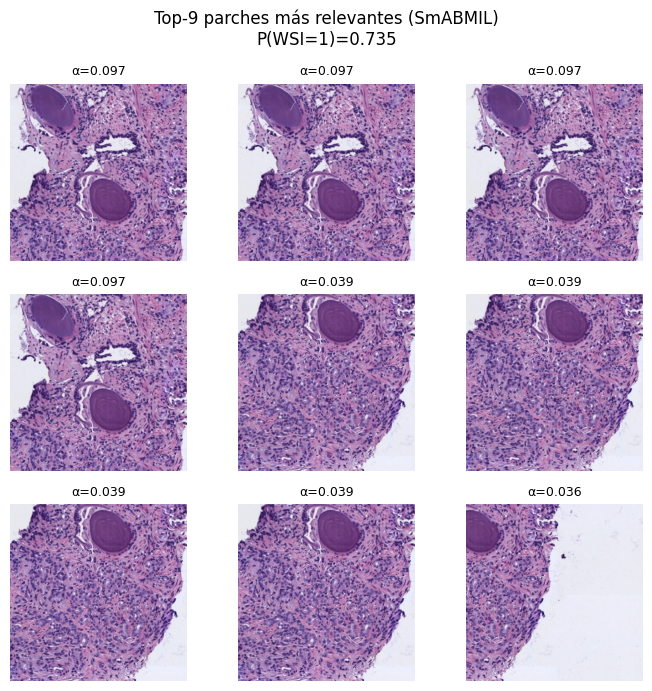

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(7,7))

for ax, i in zip(axes.flatten(), idx):
    ax.imshow(enrichedBag["images"][i])
    ax.set_title(f"α={attn[i]:.3f}", fontsize=9)
    ax.axis("off")

plt.suptitle(
    f"Top-{K} parches más relevantes (SmABMIL)\nP(WSI=1)={prob:.3f}",
    fontsize=12
)
plt.tight_layout()
plt.show()


##